In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

%matplotlib notebook

import keras

from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

In [97]:
dirs = os.listdir('/Users/ishpreet/Desktop/Major Project/Datasets/')
path = '/Users/ishpreet/Desktop/Major Project/Datasets/'
# flag=0
# labels = []
# lab=[]
langName = []

In [98]:
def removeblank(charimg):
    
    cimg = charimg.copy()
    
    r,c = cimg.shape
    
    minrow = np.inf
    maxrow = -1*np.inf
    mincol = np.inf
    maxcol = -1*np.inf
    
    for i in range(r):
            
        for j in range(c):

            if(cimg[i][j]==255 and i<minrow):
                minrow = i


            if(cimg[i][j]==255 and i>maxrow):
                maxrow = i


            if(cimg[i][j]==255 and j<mincol):
                mincol = j


            if(cimg[i][j]==255 and j>maxcol):
                maxcol = j
            
    
    new = cimg[minrow:maxrow+1 , mincol:maxcol+1]
    
    return new

In [99]:
# c = 0
# x = 0
lanc = 0
imgarr = []
#fl = 0
#chim=[]

for i in dirs:
    
  
    if(i[0]=='.'):
        continue
        
#     if(i != 'Hindi'):
#         continue
   

    print(i)
    
    st = path+i

    
    for j in os.listdir(st):
        
        
        if(j[0]=='.'):
            continue
            
        st2 = st+'/'+j
#         x = x+1
        
        count_img = 0
        
        for k in os.listdir(st2):
            
            if(k[0]=='.'):
                continue
            
            img = cv2.imread(st2+'/'+k, 0)
            
            count_img+=1
            
            if((i=='English' and count_img>180) or (i=='Hindi' and count_img>255)):
                break
            
            if(i=='Hindi'):
                random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                
            else:          
                random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            
            
            img = img.astype('uint8')
            
            finimg = img
        
            finimg = removeblank(finimg)

            finimg = cv2.resize(finimg, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)

            random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#             c = c+1

            
#             labels.append(i+j)
#             lab.append(x)
            imgarr.append(finimg)
    
            langName.append(lanc)
            
    lanc = lanc+1

Hindi
English
Tamil


<IPython.core.display.Javascript object>


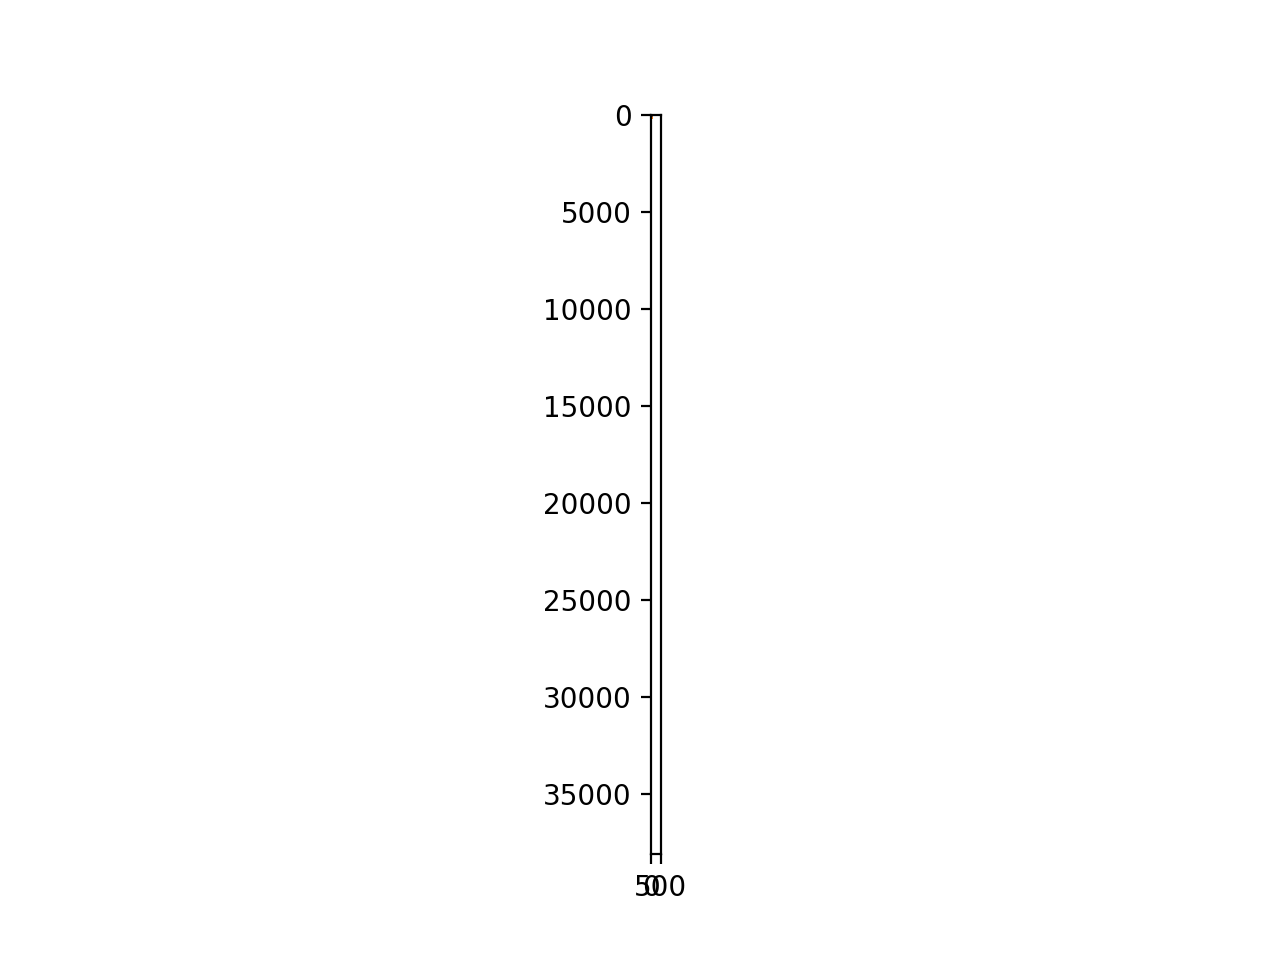

In [105]:
plt.imshow(imgarr[30001],cmap = 'gray')

In [106]:
labs = np_utils.to_categorical(langName)
labs.shape

(35184, 3)

In [107]:
np.unique(langName,return_counts=True)

(array([0, 1, 2]), array([11730, 11160, 12294]))

In [108]:
imgarr = np.array(imgarr).reshape((len(imgarr), 25, 25, 1))

In [109]:
imgarr.shape

(35184, 25, 25, 1)

In [110]:
model = Sequential()

model.add(Convolution2D(64, (3, 3), input_shape=(25, 25, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(labs.shape[1]))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 23, 23, 64)        640       
_________________________________________________________________
activation_14 (Activation)   (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
activation_15 (Activation)   (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 16)          4624      
_________________________________________________________________
activation_16 (Activation)   (None, 8, 8, 16)          0         
__________

In [111]:
hist = model.fit(imgarr, labs,
                epochs=40,
                shuffle=True,
                batch_size=100,
                validation_split=0.1)

Train on 31665 samples, validate on 3519 samples
Epoch 1/40
31665/31665 [==============================] - 27s 844us/step - loss: 1.4323 - acc: 0.3716 - val_loss: 1.2784 - val_acc: 0.0088
Epoch 2/40
31665/31665 [==============================] - 26s 824us/step - loss: 1.0904 - acc: 0.3730 - val_loss: 1.3108 - val_acc: 0.0105
Epoch 3/40
31665/31665 [==============================] - 26s 829us/step - loss: 1.0901 - acc: 0.3734 - val_loss: 1.2945 - val_acc: 0.0077
Epoch 4/40
31665/31665 [==============================] - 27s 839us/step - loss: 1.0902 - acc: 0.3738 - val_loss: 1.2869 - val_acc: 0.0014
Epoch 5/40
31665/31665 [==============================] - 27s 843us/step - loss: 1.0899 - acc: 0.3736 - val_loss: 1.3206 - val_acc: 0.0000e+00
Epoch 6/40
31665/31665 [==============================] - 28s 874us/step - loss: 1.0883 - acc: 0.3749 - val_loss: 1.2885 - val_acc: 0.0054
Epoch 7/40
31665/31665 [==============================] - 28s 880us/step - loss: 1.0901 - acc: 0.3772 - val_loss:

In [112]:
from keras.models import model_from_json
model_json = model.to_json()
with open("40epochs64kernels76.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("40epochs64kernels76.h5")
print("Saved model to disk")

Saved model to disk


In [2]:
# load json and create model
from keras.models import model_from_json
json_file = open('hindengtamwithcrop73.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("hindengtamwithcrop73.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = loaded_model 

Loaded model from disk


In [211]:
def sepwords(img1, cord, hinornot):
    img = img1.copy()
    count = 0
    coun = 0
    fincord = []
    
    area = []
    
    for n in range(len(cord)):

        if(cord[n][2]/cord[n][3]<1.4):

            fincord.append(cord[n])
            area.append(cord[n][2]*cord[n][3])
            hinornot.append(0)
            continue
            
        coun += 1

        hinimg = img[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]].copy()
        
#         %matplotlib notebook
#         plt.figure(coun)
        
#         break
        
        r,c = hinimg.shape
        s = []
        s1=0
        ms = 0
        

        for i in range(r):
            s1=0   
            for j in range(c):

                s1+=hinimg[i][j]

            if s1>=ms:
                ms = s1
                rowOfline = i
                

            s.append(s1)


        rows2del = []
        n1 = 2
        for i in range(r):

            if s[i]>=0.80*ms:

                for j in  range(c):

                    hinimg[i][j] = 0
        
        if coun == n1 : 
            hinimg2 = hinimg
#             plt.figure(count)
#             plt.imshow(hinimg,cmap='gray')
            count += 1

        hini = hinimg.copy()
        char = []
        
        image1, contours1, hierarchy1 = cv2.findContours(hini,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        #img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)
        
        for contour in contours1:
                # get rectangle bounding contour
            [x, y, w, h] = cv2.boundingRect(contour)
            
            if(y<rowOfline):
                continue

            if coun == n1 :
                print (x, y, w, h)
                hinimg1 = img[chars[n][1] + y-2:chars[n][1] + y+h, chars[n][0]+x: chars[n][0]+x+w]
#                 plt.figure(count)
#                 plt.imshow(hinimg1,cmap = 'gray')
                count += 1
            fincord.append((chars[n][0]+x, chars[n][1]+y-2, w, h+2))
            hinornot.append(1)
            area.append(w*h)  
            
    plt.figure(1)
    plt.hist(area, bins = 30, range = (0, 500))  
    print(coun)
    
    return fincord, hinimg2

(201, 828)


<IPython.core.display.Javascript object>


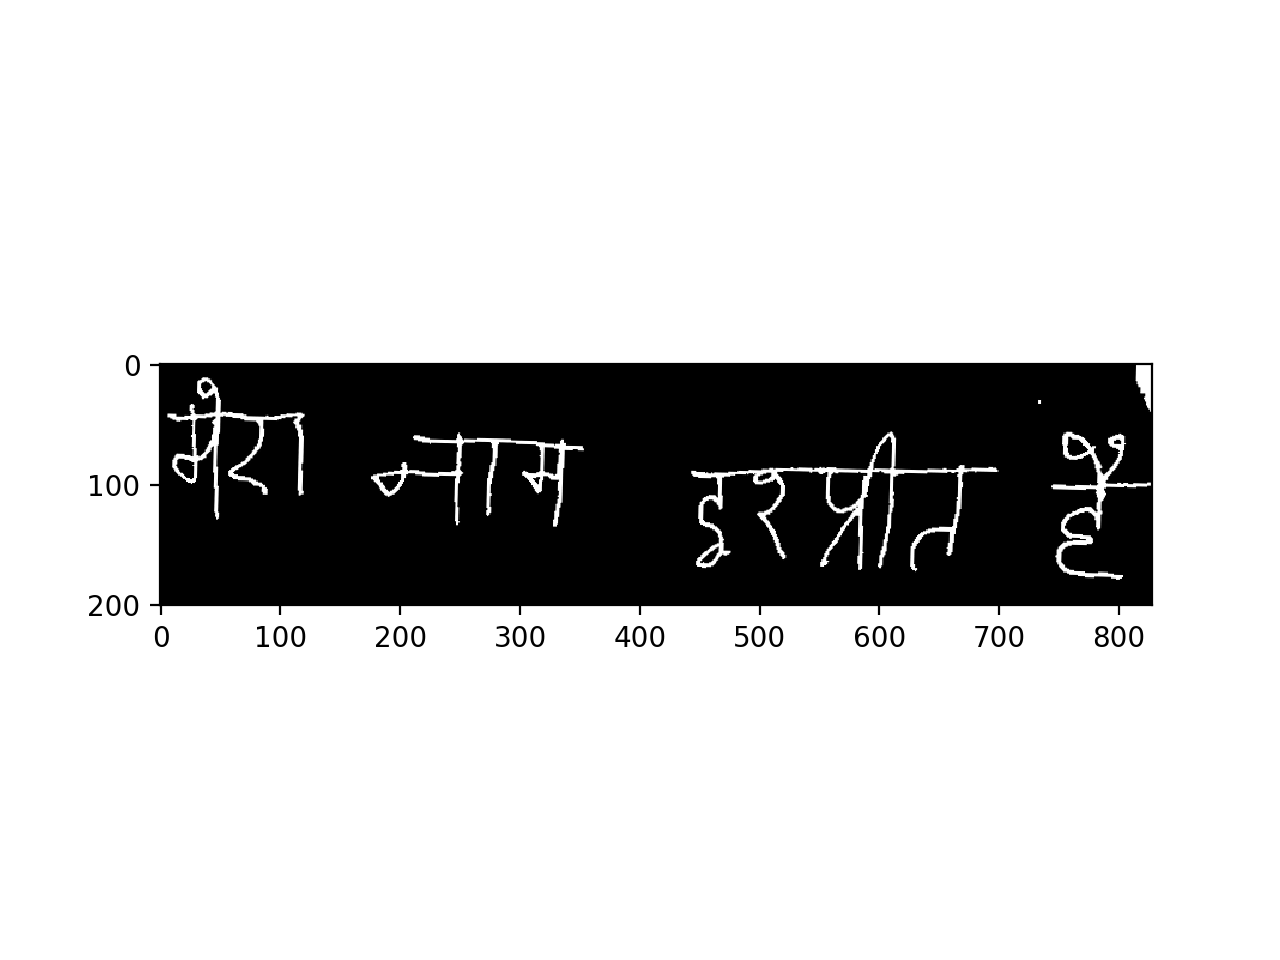

120 100 1 1
190 98 1 1
66 73 1 1
14 61 1 1
257 35 1 1
237 35 4 2
184 35 50 84
108 35 114 83
106 35 8 3
99 35 5 2
0 35 82 81
2
{0: 12, 2: 2, 1: 1}


In [226]:
predDict = {'Hindi':0 , 'English':0 , 'Tamil':0}
prd = {'Hindi':0 , 'English':0 , 'Tamil':0}
Image=cv2.imread('./Hindi/hin18.jpeg', 0)
area_pred = []
kernel = np.ones((1,1),np.uint8)
Image = cv2.morphologyEx(Image, cv2.MORPH_CLOSE, kernel)

# Image = cv2.medianBlur(Image,19)
# plt.show()

rimg , cimg = Image.shape
#Image = cv2.resize(Image, dsize=(500, 500*cimg//rimg), interpolation=cv2.INTER_CUBIC)
#create a CLAHE object (Arguments are optional).
# plt.imshow(img,cmap = 'gray')
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

Image = clahe.apply(Image)


I=Image.copy()

i=Image.copy()
G_Image=Image

print(i.shape)
chars = []

#Otsu Thresholding
blur = cv2.GaussianBlur(G_Image,(1,1),0)

ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)




# kernel = np.ones((3,3),np.uint8)
# th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)


# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(th > 0))
angle = cv2.minAreaRect(coords)[-1]
 

# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)

    
else:    
    angle = - angle
    

# rotate the image to deskew it
(h, w) = Image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
th = cv2.warpAffine(th, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

#%matplotlib notebook
#plt.imshow(th,cmap = 'gray')

# plt.imshow(th,cmap = 'gray')


plt.figure(0)
plt.imshow(th, cmap = 'gray')


image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#print('len',len(contours))
#img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)
area = []
for contour in contours:
        # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)
        
    chars.append((x,y,w,h))
    area.append(w*h)
#         if h>20:
#             continue

#     cv2.rectangle(Image, (x, y), (x + w, y + h), (0, 0, 0),1)


# %matplotlib notebook
# plt.imshow(Image)
# plt.figure(1)
# plt.hist(area, bins = 30, range = (0, 100))

newchar =[]
i = th.copy()

hinornot = []
newchar, hinimg1 = sepwords(th,chars,hinornot)

# plt.imshow(th)
# print('check' , i == th)
chars = newchar


checkar = []
checkarlab = []
checkcord = []
pred = {}
count = 0

for n in range(len(chars)):
    
    finimg = i[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]]
    
    if(finimg.shape[0]*finimg.shape[1] > rimg*cimg*0.00015 ):#and finimg.shape[0]*finimg.shape[1] < rimg*cimg*0.001):
        
        
        
        
        temp = chars[n]
        
        #print('ndjicnsi')
        
        checkcord.append(chars[n])
        
#         cv2.rectangle(Image, (chars[n][0], chars[n][1]), (chars[n][0] + chars[n][2], chars[n][1] + chars[n][3]), (0, 0, 0), 2)

        finimg = finimg.astype('uint8')
        random, finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
#         plt.figure(0)
#         plt.imshow(finimg, cmap='gray')

        finimg = cv2.resize(finimg, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)
    
        

        random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        
#         kernel = np.ones((2,2),np.uint8)
#         finimg = cv2.erode(finimg,kernel,iterations = 1)
        
        checkar.append(finimg)
        
        if count > 0 and count < 0 :
            plt.figure(count)
            plt.imshow(finimg) 
        
        
        finimg = np.array(finimg).reshape(( -1,25, 25, 1))
        predval = model.predict(finimg)
        
        if(predval[0][0]>=0.5):
            prd['Hindi']+=1
            
        
        elif(predval[0][1]>=0.5):
            prd['English']+=1
            
        
        elif(predval[0][2]>=0.5):
            prd['Tamil']+=1
        #print(predval)
        
         
        
        if count > 0 and count < 0 :
            print (predval)
            
        if(hinornot[n] == 1):
            try:
                pred[0]=pred[0]+1

            except:
            
                pred[0]=1
        
        
        else:
            try:
                predDict['Hindi'] += predval[0][0]
                predDict['English'] += predval[0][1]
                predDict['Tamil'] += predval[0][2]
                pred[np.argmax(predval)]=pred[np.argmax(predval)]+1

            except:

                predDict['Hindi'] = predval[0][0]
                predDict['English'] = predval[0][1]
                predDict['Tamil'] = predval[0][2]
                pred[np.argmax(predval)]=1

                
        
        count += 1
        checkarlab.append(predval)
        
            
            

# %matplotlib notebook
# plt.imshow(Image, cmap='gray')

print(pred)

In [85]:
max(prd, key=prd.get)

'Hindi'